In [1]:
from packages.dev_thesis.processing_results import ProcessResults
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Baseline Analysis

## Incorrect Rate by Complexity & Pipeline

In [2]:
obj = ProcessResults(r'G:\My Drive\Profissional & Acadêmico\Mestrados\DTU\5_thesis\dev_thesis\data\de_data\processed_results\all_results.xlsx', sheet_name='SQL_GENERATOR_ALL_EVALS', analysis_type='baseline')

df = obj.get_results(baseline=True)

df.head()

,chain,complexity,correctness,error_classification
0,openAIDemo,SIMPLE,y,correct
1,openAIDemo,SIMPLE,n,question_misinterpretation
2,openAIDemo,SIMPLE,y,correct
3,openAIDemo,SIMPLE,n,question_misinterpretation
4,openAIDemo,SIMPLE,n,context_misinterpretation


In [3]:
# group by chain and calculate the count of rows where correctness = n
df_grouped = df.groupby(['chain', 'correctness']).size().reset_index(name='counts')
df_grouped

,chain,correctness,counts
0,colMeta,n,47
1,colMeta,y,13
2,colMetaGuided,n,39
3,colMetaGuided,y,21
4,colMetaGuidedDV,n,36
5,colMetaGuidedDV,y,24
6,openAIDemo,n,46
7,openAIDemo,y,14


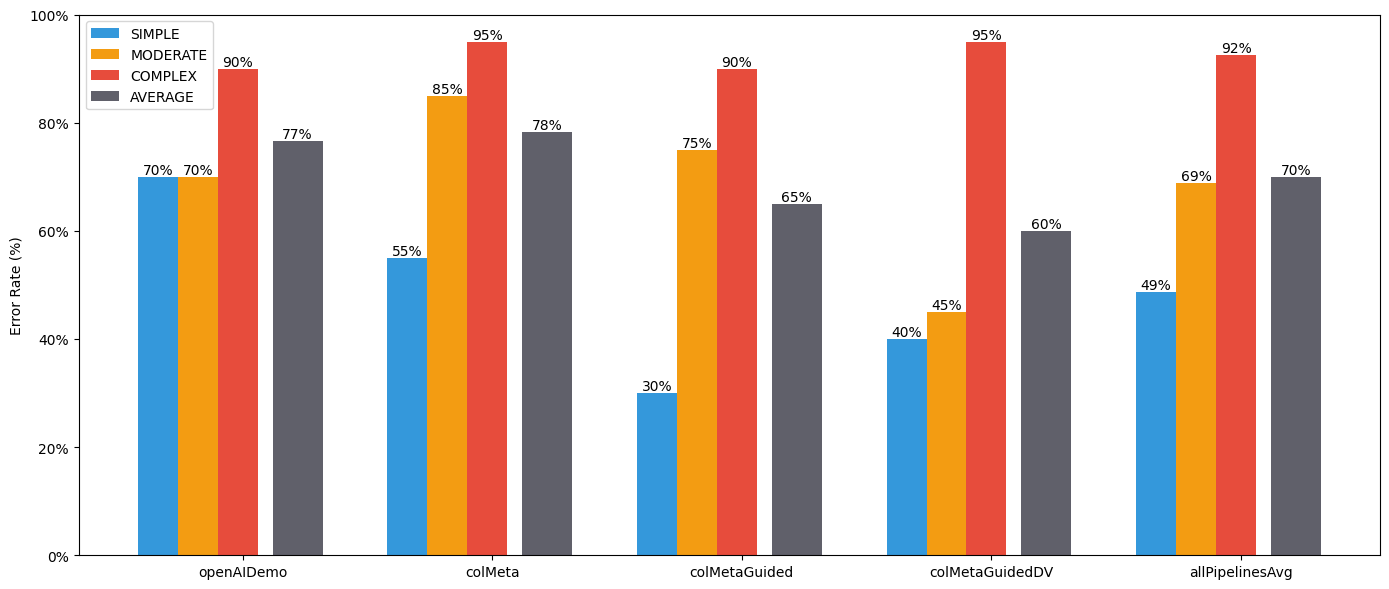

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Calculate error rates
df['error'] = df['correctness'].map({'y': 0, 'n': 1})

# Define the desired order of complexity
complexity_order = ['SIMPLE', 'MODERATE', 'COMPLEX']

# Convert complexity to categorical type with the specified order
df['complexity'] = pd.Categorical(df['complexity'], categories=complexity_order, ordered=True)

# Calculate error rates and sort by the defined complexity order
error_rates = df.groupby(['chain', 'complexity'])['error'].mean().unstack()
error_rates = error_rates.reindex(columns=complexity_order)

# Calculate average across all complexities for each chain
error_rates['AVERAGE'] = error_rates.mean(axis=1)

# Calculate average across all pipelines
all_pipelines_avg = error_rates.mean().to_frame().T
all_pipelines_avg.index = ['allPipelinesAvg']

# Add the all pipelines average to the error_rates DataFrame
error_rates = pd.concat([error_rates, all_pipelines_avg])

# Specify the new order of chains
chain_order = ['openAIDemo', 'colMeta', 'colMetaGuided', 'colMetaGuidedDV', 'allPipelinesAvg']

# Reorder the error_rates DataFrame
error_rates = error_rates.reindex(chain_order)

# Get unique chains and complexities (excluding AVERAGE for now)
chains = error_rates.index.tolist()
complexities = complexity_order  # We'll handle AVERAGE separately

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))  # Increased figure width further

bar_width = 0.2
complexity_group_width = len(complexities) * bar_width
average_bar_width = 0.25  # Slightly wider average bar
group_spacing = 0.4  # Increased spacing between groups

# Calculate the positions for each group
group_positions = np.arange(len(chains)) * (complexity_group_width + average_bar_width + group_spacing)

# Define colors for each complexity level and average
complexity_colors = {'SIMPLE': '#3498db',    # Blue
                     'MODERATE': '#f39c12',  # Orange
                     'COMPLEX': '#e74c3c',   # Red
                     'AVERAGE': '#60606A'}   # Dark gray

# Plot complexity bars
for i, complexity in enumerate(complexities):
    bar_positions = group_positions + i * bar_width
    bars = ax.bar(bar_positions, error_rates[complexity], bar_width, 
                  label=complexity, color=complexity_colors[complexity])
    
    # Add value labels on the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                f'{height:.0%}', ha='center', va='bottom')

# Plot average bars
average_positions = group_positions + complexity_group_width + bar_width/2
average_bars = ax.bar(average_positions, error_rates['AVERAGE'], average_bar_width, 
                      label='AVERAGE', color=complexity_colors['AVERAGE'])

# Add value labels on the average bars
for bar in average_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height:.0%}', ha='center', va='bottom')

ax.set_ylabel('Error Rate (%)')
ax.set_xticks(group_positions + (complexity_group_width + average_bar_width) / 2)
ax.set_xticklabels(chains)
ax.set_ylim(0, 1)  # Set y-axis limits from 0 to 1 for percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))  # Format y-axis as percentage

plt.rcParams.update({'font.size': 10})  # Adjust the number to your desired font size


# Move legend to top-left corner
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=1)

plt.tight_layout()
plt.show()

# Langsmith Data Analysis

## Error Rate By complexity

In [15]:
obj = ProcessResults(r'G:\My Drive\Profissional & Acadêmico\Mestrados\DTU\5_thesis\dev_thesis\data\de_data\processed_results\all_results.xlsx', sheet_name='LANGSMITH_FEEDBACK', analysis_type='langsmith')

df = obj.get_results(baseline=False)

# select only rows where correctness is not null
df = df[df['correctness'].notnull()]
df.count()

chain          84
complexity     84
correctness    84
dtype: int64

In [16]:
df.head()

,chain,complexity,correctness
1,SMT-NL2BI,SIMPLE,y
2,SMT-NL2BI,COMPLEX,y
3,SMT-NL2BI,MODERATE,y
4,SMT-NL2BI,SIMPLE,y
5,SMT-NL2BI,SIMPLE,n


C:\Users\GiovanniGomesGuerrei\AppData\Local\Temp\ipykernel_25052\2306779526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['error'] = df['correctness'].map({'y': 0, 'n': 1})
C:\Users\GiovanniGomesGuerrei\AppData\Local\Temp\ipykernel_25052\2306779526.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['complexity'] = pd.Categorical(df['complexity'], categories=complexity_order, ordered=True)


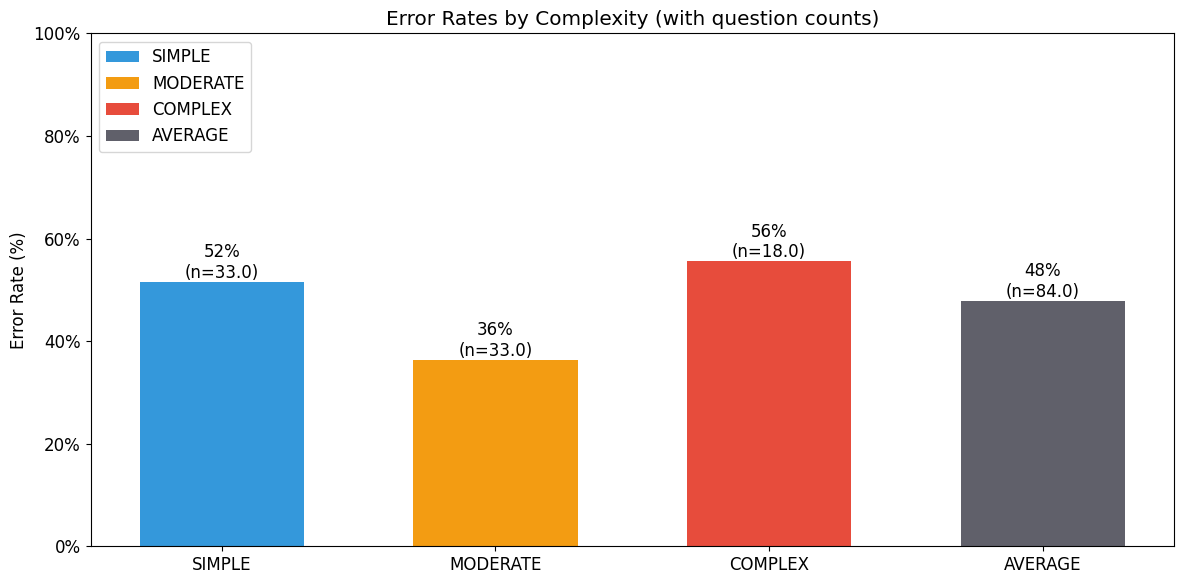

: 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Calculate error rates
df['error'] = df['correctness'].map({'y': 0, 'n': 1})

# Define the desired order of complexity
complexity_order = ['SIMPLE', 'MODERATE', 'COMPLEX']

# Convert complexity to categorical type with the specified order
df['complexity'] = pd.Categorical(df['complexity'], categories=complexity_order, ordered=True)

# Calculate error rates and total counts, then sort by the defined complexity order
error_rates = df.groupby('complexity').agg({'error': 'mean', 'correctness': 'count'})
error_rates = error_rates.reindex(index=complexity_order)
error_rates.columns = ['error_rate', 'total_count']

# Calculate average across all complexities
average_error_rate = error_rates['error_rate'].mean()
total_count = error_rates['total_count'].sum()

# Add the average to the error_rates DataFrame
error_rates.loc['AVERAGE'] = [average_error_rate, total_count]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.6
group_spacing = 0.4

# Calculate the positions for each bar
bar_positions = np.arange(len(error_rates))

# Define colors for each complexity level and average
complexity_colors = {'SIMPLE': '#3498db',    # Blue
                     'MODERATE': '#f39c12',  # Orange
                     'COMPLEX': '#e74c3c',   # Red
                     'AVERAGE': '#60606A'}   # Dark gray

# Plot bars
bars = ax.bar(bar_positions, error_rates['error_rate'], bar_width, 
              color=[complexity_colors[c] for c in error_rates.index])

# Add value labels on the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = error_rates['total_count'].iloc[i]
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height:.0%}\n(n={count})', ha='center', va='bottom')

ax.set_ylabel('Error Rate (%)')
ax.set_title('Error Rates by Complexity (with question counts)')
ax.set_xticks(bar_positions)
ax.set_xticklabels(error_rates.index)
ax.set_ylim(0, 1)  # Set y-axis limits from 0 to 1 for percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))  # Format y-axis as percentage

plt.rcParams.update({'font.size': 12})  # Adjust the number to your desired font size

# Add a legend
ax.legend(bars, error_rates.index, loc='upper left', bbox_to_anchor=(0, 1), ncol=1)

plt.tight_layout()
plt.show()